In [1]:
# References 
# https://github.com/malleshd/Machine-Learning-Regression-Models
    

#  Read the Dataset (For Training)

import pandas as pd

df = pd.read_csv('BigMart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#2. Impute missing values
# Item_Weight and Outlet_Size have missing values. It needs to be imputed

df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#imputing item_weight with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

#imputing outlet size with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# 3. Handle Categorical Data
# Convert categorical variable into dummy/indicator variables

# Drop the insignificant ID Columns

df.drop(['Item_Identifier','Outlet_Identifier'], inplace=True, axis=1)

In [9]:
## using get_dummies - Convert categorical variable into dummy/indicator variables

df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [17]:
# 4. Create Train and Test Sets

# Separate the Input Variables & Target Variables

X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

# X = df.iloc[:, :-1].values
#y = df.iloc[:, 1].values


In [18]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,False,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,False,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,False,False,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,False,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,False,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [19]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [20]:
# split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
# 5. Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train        = pd.DataFrame(X_train_scaled)

X_test_scaled  = scaler.fit_transform(X_test)
X_test         = pd.DataFrame(X_test_scaled)

In [30]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.494352,0.177222,0.336014,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.389699,0.100738,0.361727,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.220601,0.175357,0.350144,0.541667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.821375,0.046565,0.317930,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.961298,0.119695,0.506992,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,0.494352,0.844906,0.531008,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5962,0.494352,0.542624,0.100619,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5963,0.791605,0.200402,0.500067,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5964,0.300387,0.151094,0.054833,0.541667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
y_train

7013    4250.4672
1355    1066.6116
5310     115.1834
8297    1607.9070
8286    3325.0052
          ...    
2895     473.3838
7813     109.1912
905     2247.0750
5192      44.6086
235     2293.0152
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [32]:
# 6. Fit & Predict the Model and check the error rate for different K Values
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
# %matplotlib inline

In [33]:
rmse_val = []                             #To store rmse values for different k
for K in range(20):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K)
    
    model.fit(X_train, y_train)       #fit the model
    y_pred = model.predict(X_test)    #prediction on Test set
    error = sqrt(mean_squared_error(y_test, y_pred))      #calculate rmse
    rmse_val.append(error)            #store rmse values
    print('RMSE value for K= ', K, ':is', error)

RMSE value for K=  1 :is 1576.3364822937417
RMSE value for K=  2 :is 1378.4803467918423
RMSE value for K=  3 :is 1311.9726937636237
RMSE value for K=  4 :is 1290.2544630182795
RMSE value for K=  5 :is 1275.6764056860948
RMSE value for K=  6 :is 1254.7134938324716
RMSE value for K=  7 :is 1244.2676802863064
RMSE value for K=  8 :is 1243.0293379124669
RMSE value for K=  9 :is 1233.4282906528945
RMSE value for K=  10 :is 1239.3152684232318
RMSE value for K=  11 :is 1237.8240042968062
RMSE value for K=  12 :is 1240.8584221986534
RMSE value for K=  13 :is 1243.9805715619325
RMSE value for K=  14 :is 1245.4188728692206
RMSE value for K=  15 :is 1243.7464662443567
RMSE value for K=  16 :is 1245.5165085806136
RMSE value for K=  17 :is 1252.5473273417317
RMSE value for K=  18 :is 1256.8725352877943
RMSE value for K=  19 :is 1263.7960531822744
RMSE value for K=  20 :is 1266.6431151410554


<Axes: >

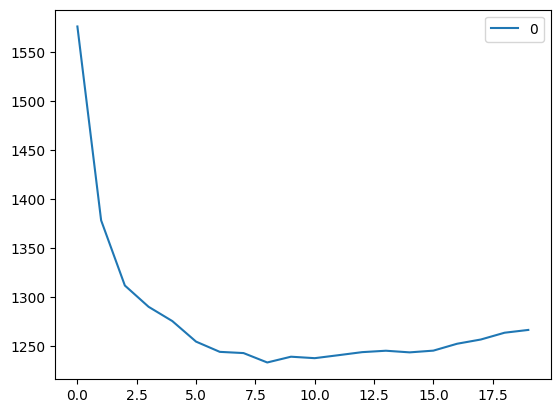

In [34]:
# Plot the Graph for K Values

curve = pd.DataFrame(rmse_val)  # Elbow Curve
curve.plot()

In [35]:
# 7. Implementing GridsearchCV
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[6,7,8,9,10,11,12]}

knn = KNeighborsRegressor()

model1 = GridSearchCV(knn, params, cv=5)
model1.fit(X_train, y_train)
model1.best_params_

{'n_neighbors': 7}